# Implement SGD on Linear Regression using Boston Home Price Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.data.shape

(506, 13)

In [7]:
columnNames = boston.feature_names
columnNames


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
Data = pd.DataFrame(boston.data, columns = columnNames)

In [9]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
Data_Labels = boston.target
Data_Labels.shape

(506,)

In [11]:
Data["PRICE"] = Data_Labels

In [12]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
Data.shape

(506, 14)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(Data, Data["PRICE"], test_size = 0.2)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 14), (102, 14), (404,), (102,))

In [16]:
m = X_train.shape[0]

**Performing Stochastic Gradient Descent by taking 10 random samples**

In [18]:
weight = np.random.randn(13)*np.sqrt(2/m)   # defining initial random weight from normal distribution
b = np.random.randn(1)*np.sqrt(2/m)   # generating initial random y-intercept from normal distribution

learningRate = 0.2

for i in range(2500):    # running 2500 iterations
    Data_batch_10 = X_train.sample(n = 10)   # taking 10 stochastic samples
    X_temp = Data_batch_10.drop("PRICE", axis = 1, inplace = False)
    X_std = StandardScaler().fit_transform(X_temp)
    X = pd.DataFrame(X_std, columns = columnNames)
    Y = Data_batch_10["PRICE"]
    PartialGradient = np.empty(13)
    sum2 = 0
    
    for j in range(13):     # as there are 13 dimensions in our dataset and dimensions of weight should also be same as dimension of our dataset
        sum1 = 0
        for k in range(10):
            sum1 += -2 * X.iloc[k][j] * (Y.iloc[k] - np.dot(weight, X.iloc[k]) - b)  # this is a derivative of linear regression w.r.t 'w
        PartialGradient[j] = sum1
    PartialGradient *= learningRate
#     print("Partial Gradient = "+str(PartialGradient))
#     print("Iteration number = "+str(i))
        
    for m in range(10):
        sum2 += -2 * (Y.iloc[m]- np.dot(weight, X.iloc[m]) - b)     # this is the derivative of linear regression w.r.t 'b'
    b = b - learningRate * sum2       #updating y-intercept 'b'
    

    for l in range(13):
        weight[l] -= PartialGradient[l]  # updating weights
        
    learningRate = 0.01 / pow(i+1, 0.25)     #learning rate at every iteration
    
    weight = weight + 0.0001*np.dot(weight, weight)   #adding l2 regularization
    b = b + 0.0001*np.dot(weight, weight) #adding L2 regularization

print("Weight = "+str(weight))
print("b = "+str(b))

Weight = [-0.66720358  0.93692443  0.30183438  1.56651885 -1.65244907  2.34823774
  1.29904108 -1.60757674  2.01636132 -1.55120368 -1.32207333  0.91111963
 -4.38953098]
b = [22.68954932]


In [19]:
import math
test_temp = X_test.drop("PRICE", axis = 1, inplace = False)
test_std = StandardScaler().fit_transform(test_temp)
test_data = pd.DataFrame(test_std, columns = columnNames)
test_labels = Y_test
y_predicted = []

for i in range(102):
    test_i = 0
    test_i = np.dot(weight, test_data.iloc[i]) + b[0]  #making prediction by using min values of weight obtained from SGD
    y_predicted.append(test_i)
    
y_true = []
for i in range(102):
    y_true.append(test_labels.iloc[i])

In [20]:
d1 = {'True Labels': Y_test, 'Predicted Labels': y_predicted}
df1 = pd.DataFrame(data = d1)
df1

,True Labels,Predicted Labels
321,23.1,25.831377
194,29.1,30.588106
491,13.6,15.126196
229,31.5,29.512823
135,18.1,18.631680
...,...,...
410,15.0,16.320685
101,26.5,26.726099
459,20.0,19.492968
102,18.6,20.490378


In [21]:
Mean_Sq_Error = mean_squared_error(y_true, y_predicted)
Mean_Sq_Error

17.72272464131956

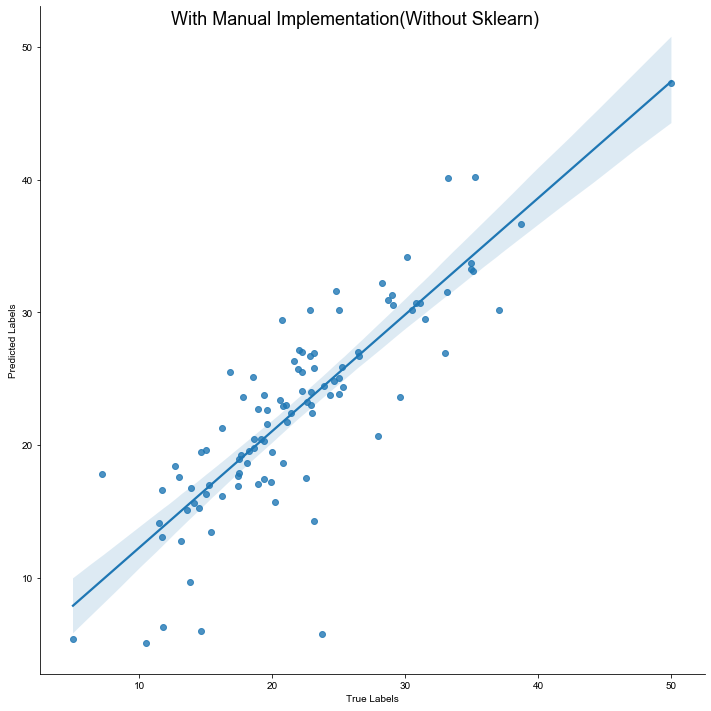

In [22]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df1, size = 10)

fig1 = lm1.fig 

fig1.suptitle("With Manual Implementation(Without Sklearn)", fontsize=18)

sns.set(font_scale = 1.5)

In [24]:
X_temp = X_train.drop("PRICE", axis = 1, inplace = False)
X_std = StandardScaler().fit_transform(X_temp)
X = pd.DataFrame(X_std, columns = columnNames)
Y = Y_train

X_test_temp = X_test.drop("PRICE", axis = 1, inplace = False)
X_test_std = StandardScaler().fit_transform(X_test_temp)
X_te = pd.DataFrame(X_test_std, columns = columnNames)
Y_te = Y_test

clf = SGDRegressor(shuffle = False, learning_rate= 'invscaling')
clf.fit(X, Y)

Y_pred = clf.predict(X_te)

print("Weight = "+str(clf.coef_))
print("Y Intercept = "+str(clf.intercept_))

Weight = [-0.95169669  1.21780229 -0.05403911  0.73008454 -2.45853667  2.64499627
  0.52735692 -3.06940269  2.6781827  -1.70012849 -2.10198845  0.8446795
 -4.29785862]
Y Intercept = [22.68636891]


In [25]:
d2 = {'True Labels': Y_te, 'Predicted Labels': Y_pred}
df2 = pd.DataFrame(data = d2)
df2

,True Labels,Predicted Labels
321,23.1,25.846693
194,29.1,33.232271
491,13.6,13.212030
229,31.5,32.215706
135,18.1,16.780033
...,...,...
410,15.0,15.037478
101,26.5,26.826489
459,20.0,18.577427
102,18.6,20.430162


In [26]:
Mean_Sq_Error = mean_squared_error(Y_te, Y_pred)
Mean_Sq_Error

17.50344982262468

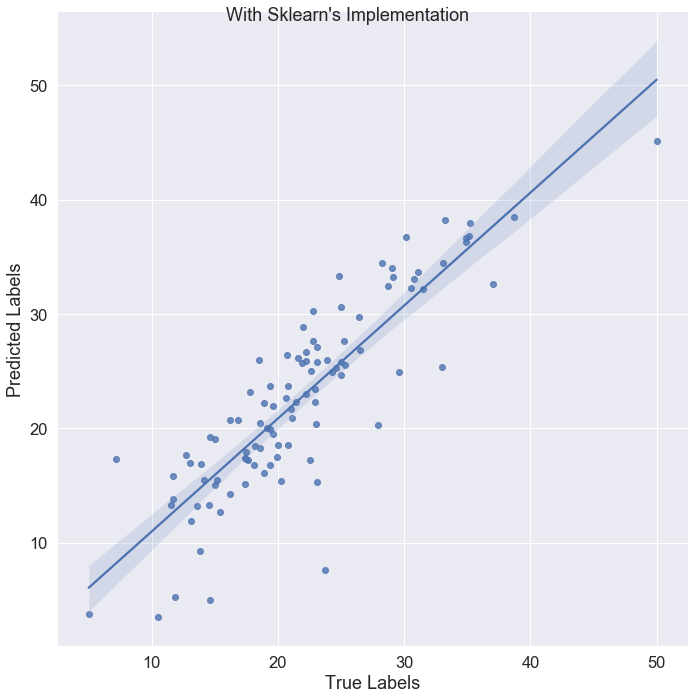

In [27]:
lm2 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df2, size = 10)

fig2 = lm2.fig 

# Add a title to the Figure
fig2.suptitle("With Sklearn's Implementation", fontsize=18)

sns.set(font_scale = 1.5)

## Final Verdict:
### Mean Square Error
<b>Manual Implementation: 17.503</b><br>
<b>Sklearn Implementation: 17.722</b>

### Implementation of gradient descent
First of all, we need to explain what's __gradient descent__. Simply put, it's a method to find the lowest Y value for a given function. In our case, we need to __minimize__ the __Mean Squared Error__ function to find the best line that fits our data. <br><br>
To do that, we need to calculate the __partial derivative__ of our function with respect to both m and b. As we know, a 0 derivative means that we are either in a local minima, or a local maxima. Which means that __the closer we get to 0 the better__.<br><br>
The equation of our line:
$$
\begin{align*}
Y &= mX + b \\
\end{align*}
$$
<br>
The __Mean Squared Error__ function after we replace $\hat{Y}$ with the function:
$$
\begin{align*}
MSE &= \frac{1}{n}\sum_{i=1}^N(Y_i - (mX_i + b))^2
\end{align*}
$$
<br>
Now we calculate the __partial derivative__ of our __Mean Squared Error__ function: <br><br>
$$
\begin{align*}
\frac{\partial}{\partial m} &= \frac{2}{N}\sum_{i=1}^N-X_i(Y_i-(mX_i + b)) \\\\
\frac{\partial}{\partial b} &= \frac{2}{N}\sum_{i=1}^N-(Y_i-(mX_i + b))
\end{align*}
$$
<br>
The process of finding the optimal values for m and b is to then __minimize__ our derivatives. To do that we use the __gradient descent__ formula:
$$
\begin{align*}
a_{n+1} &= a_{n} - \gamma \frac{\partial}{\partial a_{n}}f(a_n)
\end{align*}
$$
Where:<br>
$\gamma$ : the learning rate<br>
$a_{n+1}$ : the new value<br>
$a_n$ : the old value<br>
$f(a_n)$ : the function we are looking to minimize
<br><br>
Sources: 
* https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0
* https://www.youtube.com/watch?v=umAeJ7LMCfU
* https://medium.com/meta-design-ideas/linear-regression-by-using-gradient-descent-algorithm-your-first-step-towards-machine-learning-a9b9c0ec41b1